In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
#Cargamos el dataframe limpio
df = pd.read_csv("datos/SpotifyYtlimpio.csv", index_col="Unnamed: 0")
pd.options.display.max_columns = None

In [3]:
df_album = df[df["album_type"] == "album"]
df_single = df[df["album_type"]== "single"]
df_compilation = df[df["album_type"] == "compilation"]

In [4]:
def atributoscancion():
    media_dc = df_album["danceability"].mean()
    std_dc = df_album["danceability"].std()
    media_ac = df_album["acousticness"].mean()
    std_ac = df_album["acousticness"].std()
    media_sp = df_album["speechiness"].mean()
    std_sp = df_album["speechiness"].std()
    data = {'media':[media_dc,media_ac,media_sp], 'std': [std_dc,std_ac,std_sp]}
    df_data = pd.DataFrame.from_dict(data, orient='index', 
                                 columns=['danceability', 'acousticness', 'speechiness']).round(2)
    print(df_data)

In [5]:
atributoscancion()

       danceability  acousticness  speechiness
media          0.61          0.29         0.09
std            0.17          0.29         0.11


In [6]:
def toplikesviews():
    df_views = df.groupby("artist")["views"].mean().round(2).reset_index()
    df_likes = df.groupby("artist")["likes"].mean().round(2).reset_index()
    df_views.sort_values(by='views', ascending= False,inplace=True)
    views_top =df_views.head(10)
    df_likes.sort_values(by="likes", ascending= False, inplace=True)
    likes_top = df_likes.head(10)
    fig,ax = plt.subplots(2,1, figsize = (15,10))
    sns.barplot(x="artist",y= "views", data= views_top, palette= "crest", ax = ax[0])
    for indice, valor in enumerate(views_top["views"]):
        ax[0].text(indice,valor, str(valor), horizontalalignment = "center", fontsize = 8);
    sns.barplot(x="artist", y="likes",data=likes_top, palette ="viridis", ax = ax[1])
    for indice, valor in enumerate(likes_top["likes"]):
        ax[1].text(indice,valor, str(valor), horizontalalignment = "center", fontsize = 8);
    ax[0].set_title("Top 10 visualizaciones")
    ax[1].set_title("Top 10 likes")
    plt.show()

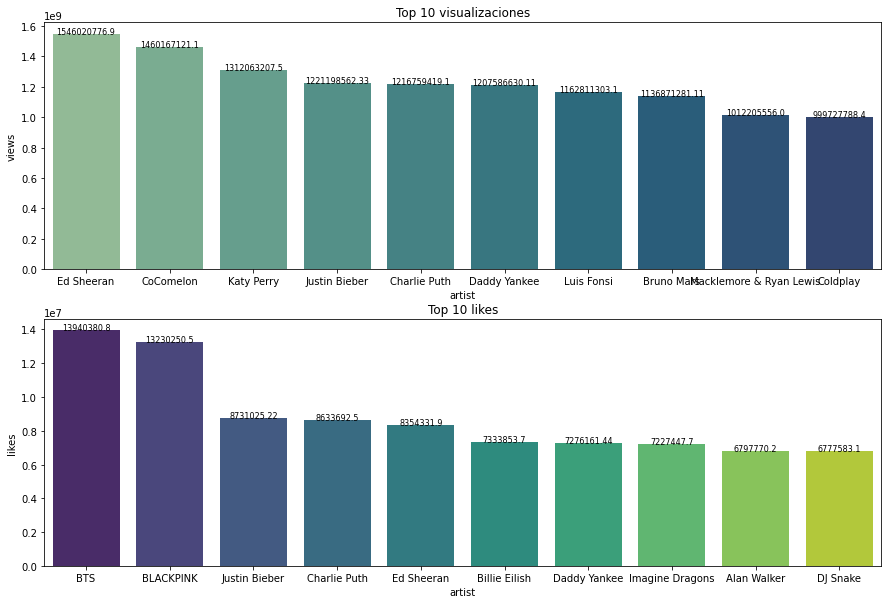

In [7]:
toplikesviews()

In [8]:
def topviewlikesingle():
    single_likes = df_single.sort_values(by=["likes"], ascending=False)
    single_views = df_single.sort_values(by=["views"], ascending=False)
    top_slikes = single_likes.head(10)
    top_sviews = single_views.head(10)
    fig,ax = plt.subplots(2,1, figsize = (15,10))
    sns.barplot(x="artist",y = "views",data=top_sviews, palette = "flare", ax = ax[0])
    for indice, valor in enumerate(top_sviews["views"]):
        ax[0].text(indice,valor, str(valor), horizontalalignment = "center", fontsize = 8);
    sns.barplot(x="artist", y= "likes",data=top_slikes, palette ="rocket", ax = ax[1])
    for indice, valor in enumerate(top_slikes["likes"]):
        ax[1].text(indice,valor, str(valor), horizontalalignment = "center", fontsize =8);
    ax[0].set_title("Single top 10 visualizaciones")
    ax[1].set_title("Single top 10 likes")
    plt.show()

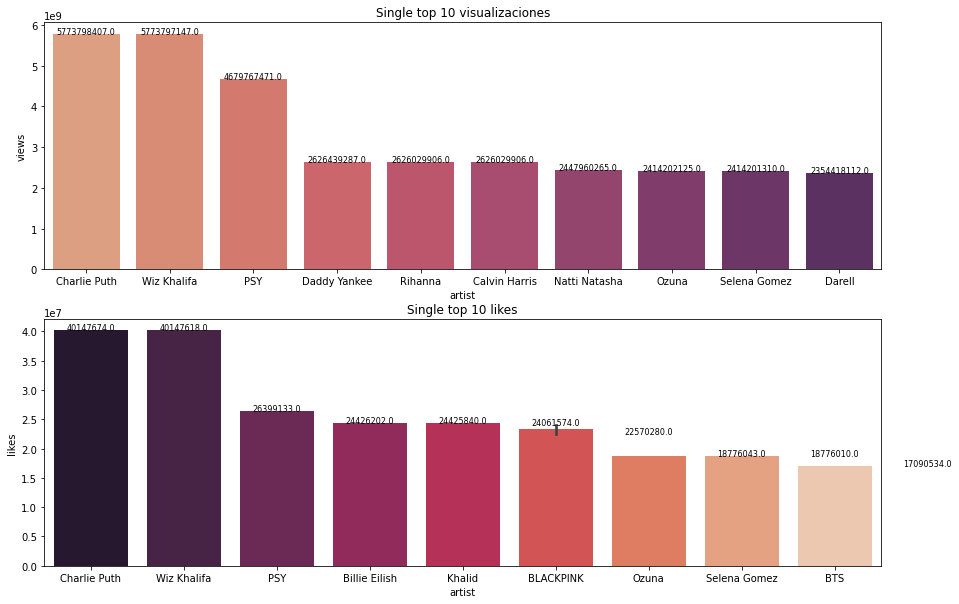

In [9]:
topviewlikesingle()

In [10]:
def colaboracion():
    patron = "feat"
    colaboraciones = df[df["track"].str.contains(patron, regex= True)]
    print("Los artistas han hecho esta cantidad de colaboraciones",colaboraciones.groupby("artist")["track"].count().reset_index())
    artist_colab = colaboraciones.groupby("artist")["track"].count().reset_index()
    artist_colab.sort_values(by="track", ascending = False,inplace=True)
    ten_colab = artist_colab.head(10)
    plt.figure(figsize= (15,5))
    sns.barplot(x="artist", y= "track",data=ten_colab, palette = 'mako')
    plt.title("Top 10 artistas que han hecho colaboraciones")
    plt.ylabel("colaboraciones")
    for indice, valor in enumerate(ten_colab["track"]):
        plt.text(indice, valor + 0.10, str(valor),
        horizontalalignment  = "center", fontsize = 8);
    plt.show()

Los artistas han hecho esta cantidad de colaboraciones                 artist  track
0            070 Shake      1
1                  112      4
2               1nonly      1
3             2 Chainz      1
4            21 Savage      2
..                 ...    ...
673              keshi      1
674  sped up nightcore      1
675             thasup      8
676               Ñejo      1
677         Ñengo Flow      1

[678 rows x 2 columns]


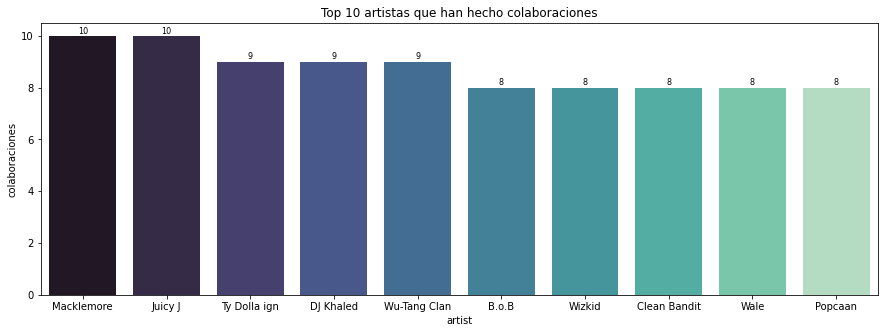

In [11]:
colaboracion()

In [12]:
def visitasportipo():
    plt.figure(figsize=(15,10))
    fig = sns.boxplot(x="album_type", y = "views", data=df)
    fig.set(xlabel = "Album type", ylabel = "views")
    fig.set_title("Relación entre el tipo de album y las visitas")
    fig.set_ylim(0,2e8)
    plt.show()
    df_album["popularidad"] = np.where(df_album["views"]> 1.85e8, "alta","normal")
    df_single["popularidad"] = np.where(df_single["views"]> 1.60e8, "alta","normal")
    df_compilation["popularidad"] = np.where(df_compilation["views"]> 1.70e8, "alta","normal")
    popa = df_album['popularidad'].value_counts().reset_index()
    pops = df_single['popularidad'].value_counts().reset_index()
    popc = df_compilation['popularidad'].value_counts().reset_index()
    
    explode = (0.1,0.1)
    plt.figure(facecolor="white", figsize = (10,5))
    plt.pie(popa['popularidad'], labels= popa["index"], autopct='%1.1f%%', colors = ['purple','indigo'], explode = explode)
    plt.title("Relación entre el IQR de visitas y los outliers para albums")
    plt.show();
    
    plt.figure(facecolor="white", figsize = (10,5))
    plt.pie(pops['popularidad'],labels= pops["index"], autopct='%1.1f%%', colors = ['yellow','coral'], explode = explode)
    plt.title("Relación entre el IQR de visitas y los outliers para single")
    plt.show();
    
    plt.figure(facecolor="white", figsize = (10,5))
    plt.pie(popc['popularidad'], labels= popc["index"], autopct='%1.1f%%', colors = ['blueviolet','mediumslateblue'], explode = explode)
    plt.title("Relación entre el IQR de visitas y los outliers para compilación")
    plt.show();

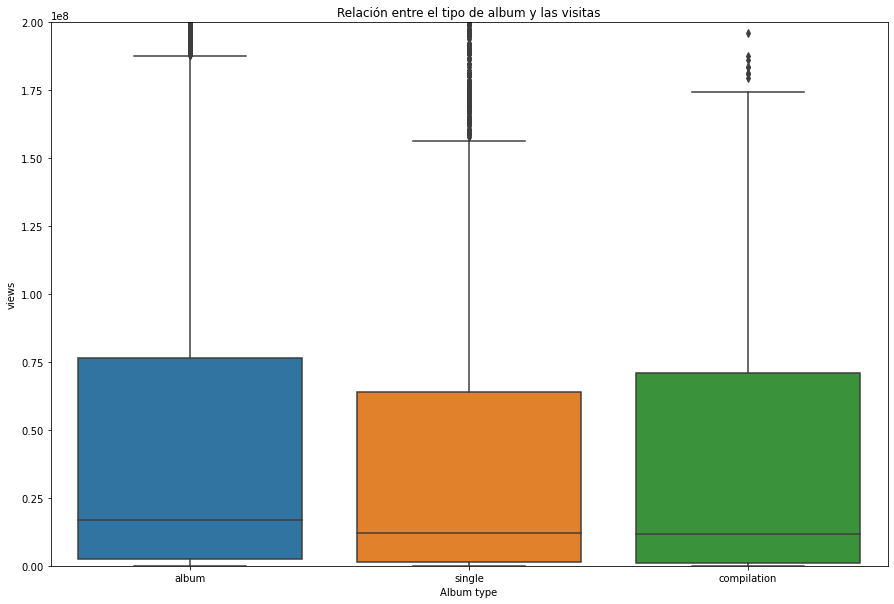

/tmp/ipykernel_17427/2322907090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_album["popularidad"] = np.where(df_album["views"]> 1.85e8, "alta","normal")
/tmp/ipykernel_17427/2322907090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single["popularidad"] = np.where(df_single["views"]> 1.60e8, "alta","normal")
/tmp/ipykernel_17427/2322907090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

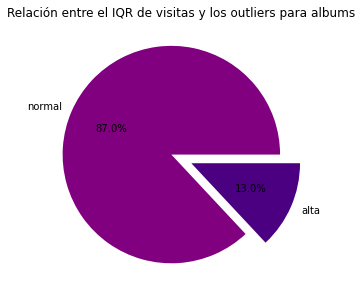

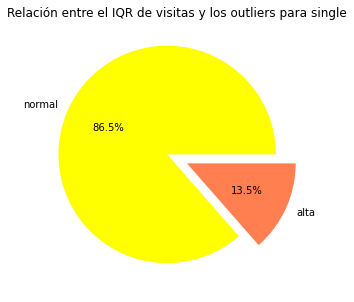

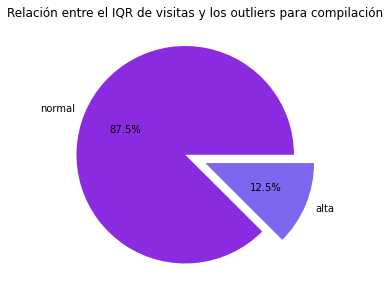

In [13]:
visitasportipo()